校验kmeans的结果，合成信号值， 多头信号1 数据应该集中数据头部，  空头信号-1 数据应该集中在数据尾部  中间处于不动即0.相对于4.2 不需要重头计算数据

In [1]:
import os
import pandas as pd
from lumina.genetic.fusion import Rotor
from lumina.genetic import Actuator
from kdutils.cache import exist_cache, load_cache 

In [2]:
code = 'IM'
task_id = '100014'
method = 'aicso2'

In [3]:
positions_data = load_cache(code=code,
                            task_id=task_id,
                            method=method,
                            cache_file='positions_data.pkl')
positions_data.name = 'value'
positions_data = positions_data.reset_index().set_index('trade_time')
positions_data.head()

please wait! load_pickle....: cache/abily/IM/100014/aicso2/positions_data.pkl


,code,value
trade_time,,
2022-07-25 09:30:00,IM,0.0
2022-07-25 09:31:00,IM,0.0
2022-07-25 09:32:00,IM,0.0
2022-07-25 09:33:00,IM,0.0
2022-07-25 09:34:00,IM,0.0


In [4]:
def fetch_rotor(name):
    base_path = '/workspace/worker/pj/Chrono/lumina/abily/records/aicso2/ims/kmeans'
    rotor = Rotor.from_pickle(
            path=os.path.join(base_path, code), name=name)
    return rotor


In [5]:
rotor1 = fetch_rotor('1002868688')
signal_data = rotor1.predict(positions_data)
signal_data.name = 'signal'
t1_dt = pd.concat([positions_data, signal_data], axis=1)
short = t1_dt[t1_dt['signal']==-1].value.max()
long = t1_dt[t1_dt['signal']==1].value.max()
zero = t1_dt[t1_dt['signal']==0].value.max()
print("short:{0}, long:{1}, zero:{2}, mapping:{3}".format(short, long, zero, rotor1._best_mapping))

short:0.05417252476287284, long:-0.6258432781472447, zero:-0.7103319556180234, mapping:{0: 1, 1: 0, 2: -1}


In [6]:
rotor1 = fetch_rotor('1029505992')
signal_data = rotor1.predict(positions_data)
signal_data.name = 'signal'
t1_dt = pd.concat([positions_data, signal_data], axis=1)
short = t1_dt[t1_dt['signal']==-1].value.max()
long = t1_dt[t1_dt['signal']==1].value.max()
zero = t1_dt[t1_dt['signal']==0].value.max()
print("short:{0}, long:{1}, zero:{2}, mapping:{3}".format(short, long, zero, rotor1._best_mapping))

short:-0.7103319556180234, long:-0.6258432781472447, zero:0.05417252476287284, mapping:{0: 1, 1: -1, 2: 0}


In [7]:
rotor1 = fetch_rotor('1036372489')
signal_data = rotor1.predict(positions_data)
signal_data.name = 'signal'
t1_dt = pd.concat([positions_data, signal_data], axis=1)
short = t1_dt[t1_dt['signal']==-1].value.max()
long = t1_dt[t1_dt['signal']==1].value.max()
zero = t1_dt[t1_dt['signal']==0].value.max()
print("short:{0}, long:{1}, zero:{2}, mapping:{3}".format(short, long, zero, rotor1._best_mapping))

short:-0.6258432781472447, long:-0.7103319556180234, zero:0.05417252476287284, mapping:{0: -1, 1: 1, 2: 0}


In [8]:
rotor1 = fetch_rotor('1041742792')
signal_data = rotor1.predict(positions_data)
signal_data.name = 'signal'
t1_dt = pd.concat([positions_data, signal_data], axis=1)
short = t1_dt[t1_dt['signal']==-1].value.max()
long = t1_dt[t1_dt['signal']==1].value.max()
zero = t1_dt[t1_dt['signal']==0].value.max()
print("short:{0}, long:{1}, zero:{2}, mapping:{3}".format(short, long, zero, rotor1._best_mapping))

short:0.05417252476287284, long:-0.7103319556180234, zero:-0.6258432781472447, mapping:{0: 0, 1: 1, 2: -1}


In [9]:
rotor1 = fetch_rotor('1085310361')
signal_data = rotor1.predict(positions_data)
signal_data.name = 'signal'
t1_dt = pd.concat([positions_data, signal_data], axis=1)
short = t1_dt[t1_dt['signal']==-1].value.max()
long = t1_dt[t1_dt['signal']==1].value.max()
zero = t1_dt[t1_dt['signal']==0].value.max()
print("short:{0}, long:{1}, zero:{2}, mapping:{3}".format(short, long, zero, rotor1._best_mapping))

short:-0.7103319556180234, long:0.05417252476287284, zero:-0.6258432781472447, mapping:{0: 0, 1: -1, 2: 1}


In [10]:
rotor1 = fetch_rotor('1086443513')
signal_data = rotor1.predict(positions_data)
signal_data.name = 'signal'
t1_dt = pd.concat([positions_data, signal_data], axis=1)
short = t1_dt[t1_dt['signal']==-1].value.max()
long = t1_dt[t1_dt['signal']==1].value.max()
zero = t1_dt[t1_dt['signal']==0].value.max()
print("short:{0}, long:{1}, zero:{2}, mapping:{3}".format(short, long, zero, rotor1._best_mapping))

short:-0.6258432781472447, long:0.05417252476287284, zero:-0.7103319556180234, mapping:{0: -1, 1: 0, 2: 1}


In [11]:
import joblib
def load_metrics(name):
    rotor1 = fetch_rotor(name)
    mapping_name = "3_{0}_{1}_{2}".format(rotor1._best_mapping[0], rotor1._best_mapping[1], rotor1._best_mapping[2])
    base_path = '/workspace/worker/pj/Chrono/lumina/abily/records/aicso2/ims/metrics'
    filename = os.path.join(base_path, '{0}.pkl'.format(mapping_name))
    metrics = joblib.load(filename)
    return metrics

<Axes: title={'center': '1085310361 Cumulative Returns'}, xlabel='trade_time'>

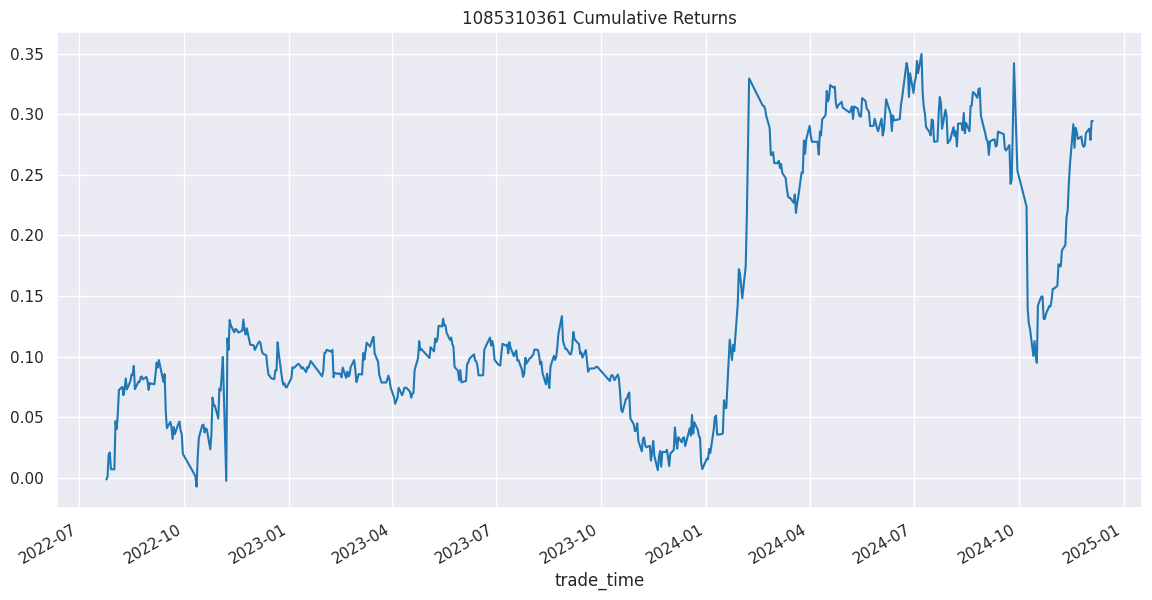

In [20]:
load_metrics('1085310361').empyrical.returns_series.cumsum().plot(title='1085310361 Cumulative Returns')